In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score,calinski_harabasz_score

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
plt.rcParams['axes.unicode_minus']=False#显示负号

%matplotlib inline
plt.style.use("ggplot")

#读取数据
order=pd.read_csv("C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_order_items_dataset.csv")
deliver=pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_orders_dataset.csv')
pay=pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_order_payments_dataset.csv')
customer=pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_customers_dataset.csv')

#数据预处理和表格连接
order1=order.groupby(by='order_id').agg({'order_item_id':sum,'shipping_limit_date':'first'}).reset_index()
pay1=pay.groupby(by='order_id').agg({'payment_value':sum,'payment_type':'first'}).reset_index()
deliver_happened=deliver[~((deliver.order_status=='canceled')|(deliver.order_status=='unavailable'))]
order2=order1.merge(right=pay1,left_on='order_id',right_on='order_id').merge(right=deliver_happened,left_on='order_id',right_on='order_id')
order2=order2.merge(right=customer,left_on='customer_id',right_on='customer_id')
order2['shipping_limit_date']=pd.to_datetime(order2.shipping_limit_date)
order2['ordermonth']=order2.shipping_limit_date.values.astype('datetime64[M]')

product=pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_products_dataset.csv')
review=pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/olist_order_reviews_dataset.csv')

review1=review.iloc[:,1:3]
review2=review1.merge(right=pay,left_on='order_id',right_on='order_id')
p=order.merge(right=review2,left_on='order_id',right_on='order_id').groupby('product_id').agg({'price':'first','freight_value':'first','payment_value':sum,'order_item_id':sum,'review_score':'mean'})
p1=product.merge(right=p,how='left',left_on='product_id',right_on='product_id')

#去除不全的数据
order2=order2[(order2.ordermonth>'2016-12-31')&(order2.ordermonth<'2018-08-02')]

C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\631472156.py:14: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  order1=order.groupby(by='order_id').agg({'order_item_id':sum,'shipping_limit_date':'first'}).reset_index()
C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\631472156.py:15: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pay1=pay.groupby(by='order_id').agg({'payment_value':sum,'payment_type':'first'}).reset_index()
C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\631472156.py:27: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pa

In [4]:
cat=pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/product_category_name_translation.csv')

In [5]:
order3=order.merge(right=product,left_on='product_id',right_on='product_id').merge(right=cat,left_on='product_category_name',right_on='product_category_name')
watch=order3[order3.product_category_name_english=='watches_gifts']

C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\3801838361.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(watch1[watch1.price<1000].price)
C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\3801838361.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(watch2[watch2.price<1000].price)


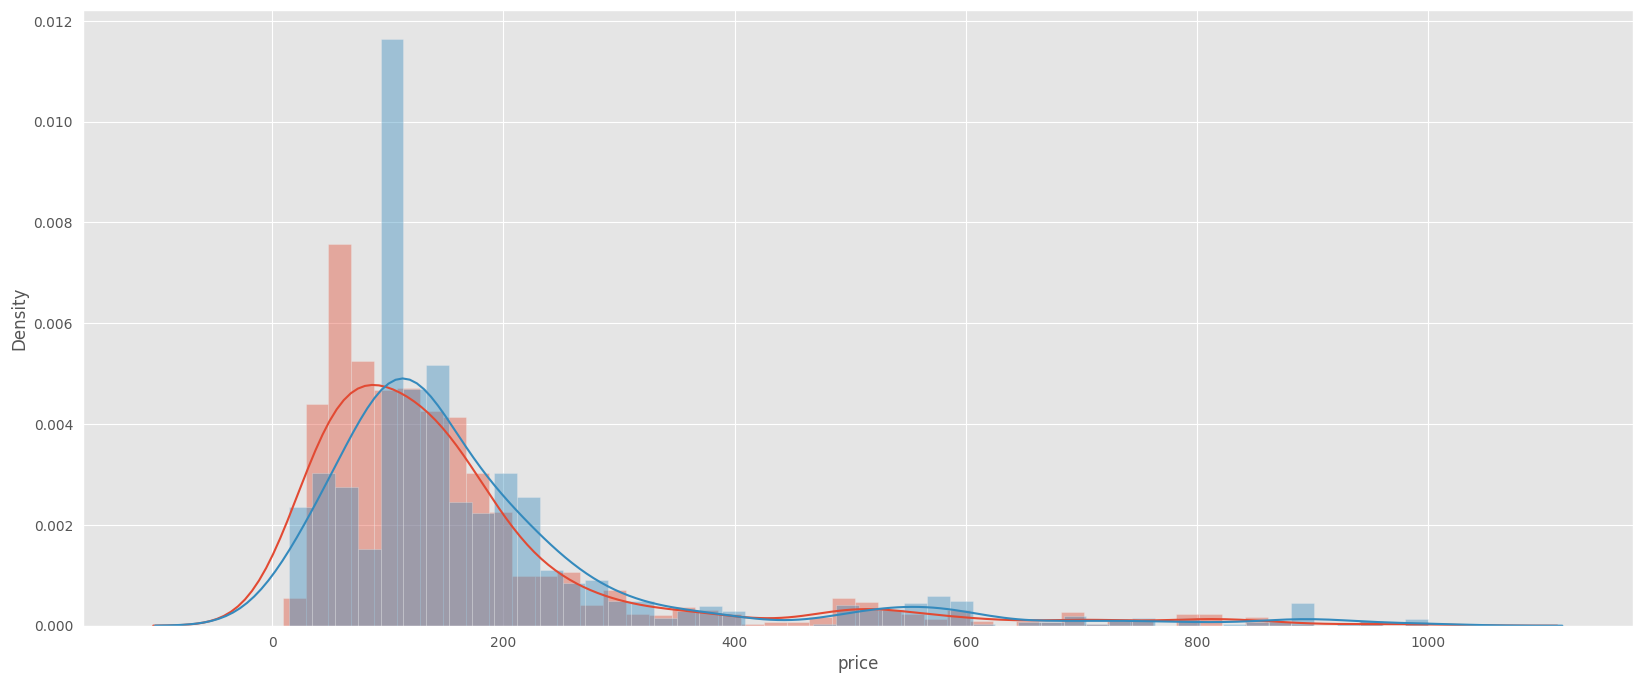

In [13]:
watch=order3[order3.product_category_name_english=='watches_gifts']
watch1=watch[(watch.shipping_limit_date>'2018-06-01')&(watch.shipping_limit_date<'2018-09-01')]
watch2=watch[(watch.shipping_limit_date<'2018-06-01')&(watch.shipping_limit_date>'2018-03-01')]
plt.figure(figsize=(20, 8))  # 設定背景顏色為白色
sns.distplot(watch1[watch1.price<1000].price)
sns.distplot(watch2[watch2.price<1000].price)
plt.show()

C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\1179039644.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health1[health1.price < 1000].price)
C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\1179039644.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health2[health2.price < 1000

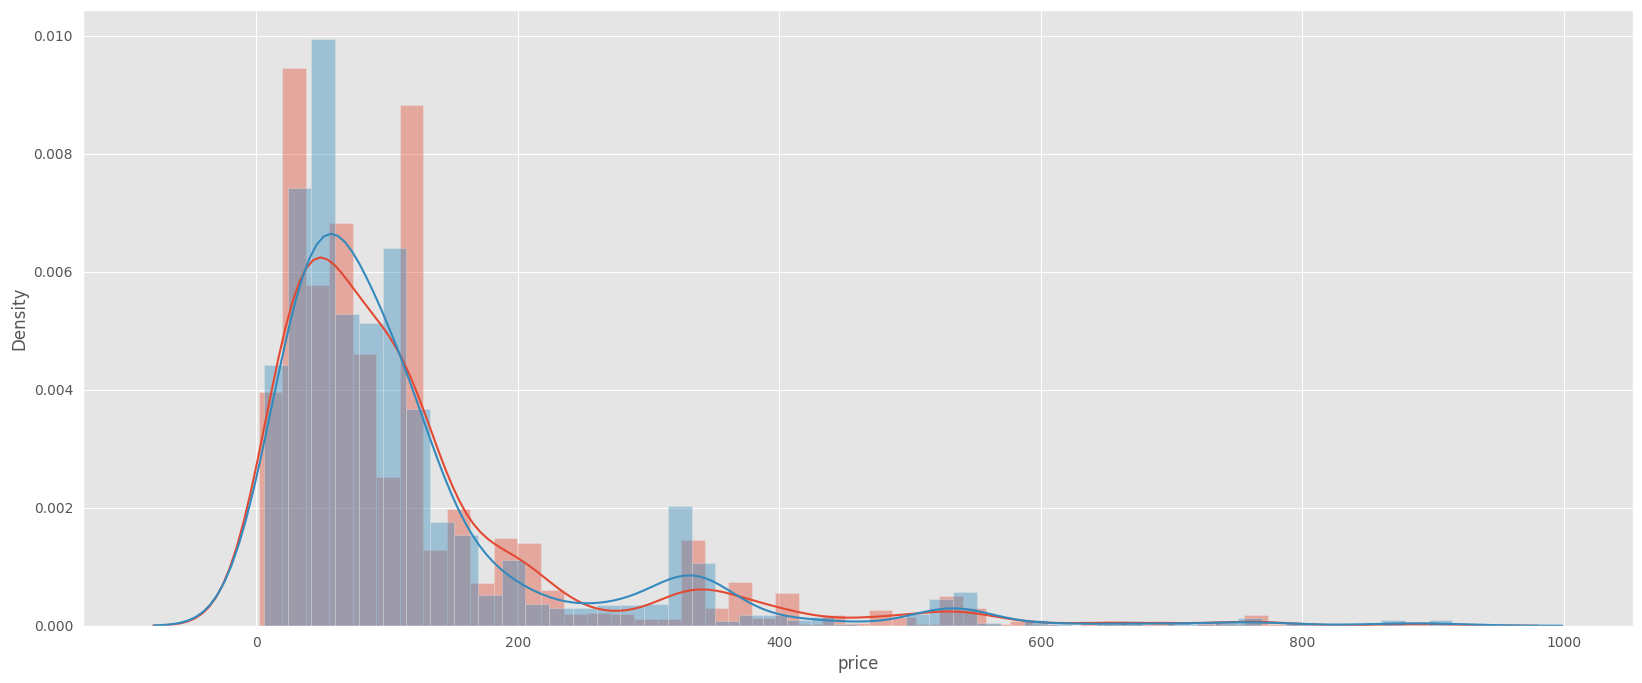

In [17]:
cat2 = pd.read_csv('C:/Users/KK Chan/Desktop/作業/fianl_project/data/product_category_name_translation.csv')
order4 = order.merge(right=product, left_on='product_id', right_on='product_id').merge(right=cat,
                                                                                       left_on='product_category_name',
                                                                                       right_on='product_category_name')
health = order4[order4.product_category_name_english == 'health_beauty']
health1 = health[(health.shipping_limit_date > '2018-06-01') & (health.shipping_limit_date < '2018-09-01')]
health2 = health[(health.shipping_limit_date < '2018-06-01') & (health.shipping_limit_date > '2018-03-01')]
plt.figure(figsize=(20, 8))  # 設定背景顏色為白色
sns.distplot(health1[health1.price < 1000].price)
sns.distplot(health2[health2.price < 1000].price)
plt.show()

In [18]:
from sklearn.cluster import KMeans

#预处理
p1.price.fillna(p1.price.mean(),inplace=True)
x=p1.iloc[:,[9,11,12,13]]
ss=StandardScaler()
train_ss_x=ss.fit_transform(x)
#建模
kmeans=KMeans(n_clusters=8)
kmeans=kmeans.fit(train_ss_x)
predict_y=kmeans.predict(train_ss_x)
predict_y=pd.DataFrame(predict_y)
#优化聚类数目
from sklearn.metrics import calinski_harabasz_score
score={}
for i in range(2,15):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(train_ss_x)
    predict_y=kmeans.predict(train_ss_x)
    score[i]=(calinski_harabasz_score(train_ss_x,predict_y))
print(score)
# #结果显示
# result=pd.concat((x,predict_y),axis=1)
# result.columns=['price', 'payment_value', 'order_item_id', 'review_score', 'label']
# pd.set_option('display.max_columns',None)
# result.groupby('label').agg(['count','mean'])

C:\Users\KK Chan\AppData\Local\Temp\ipykernel_25212\1028222769.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  p1.price.fillna(p1.price.mean(),inplace=True)


{2: 9904.88979561043, 3: 11889.558348119315, 4: 14105.205677726335, 5: 15974.190762454551, 6: 15601.288959252017, 7: 15819.344468894808, 8: 17121.02033819402, 9: 14408.712343085865, 10: 16633.88868832271, 11: 16950.15175842712, 12: 16230.610420879932, 13: 15759.98530309392, 14: 16553.478293145046}


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [20]:
#结果显示
result = pd.concat([x, pd.DataFrame(predict_y)], axis=1)
result.columns=['price', 'payment_value', 'order_item_id', 'review_score', 'label']
pd.set_option('display.max_columns',None)
result.groupby('label').agg(['count','mean'])

price              payment_value               order_item_id  \
       count         mean         count          mean         count   
label                                                                 
0      14402    86.955861         14402    209.645896         14402   
1       2945   139.903239          2945    323.171362          2945   
2         27   112.036296            27  28754.853704            27   
3       2205   455.607492          2205    946.335977          2205   
4        284   269.430599           284   8051.787923           284   
5         93  2839.516882            93   4336.677634            93   
6       4106    94.019966          4106    323.623604          4106   
7          6    57.916667             6  60490.683333             6   
8       6824    84.812600          6824    355.333636          6824   
9         20   913.247000            20  28391.458000            20   
10       112    88.009464           112  11327.395357           112   
11      1381    90.482737          1381   2336.935018          1381   
12       538  1215.873978           538   2140.055149           538   
13         8   381.575000             8  70307.987500             8   

                  review_score            
             mean        count      mean  
label                                     
0        2.042564        14402  4.943242  
1        2.096435         2945  1.060252  
2      194.333333           27  3.684889  
3        2.014059         2205  4.589775  
4       33.126761          284  3.772298  
5        1.645161           93  4.018203  
6        2.844618         4106  2.763590  
7      624.000000            6  3.948281  
8        3.648007         6824  3.985171  
9       35.150000           20  3.489596  
10     102.107143          112  3.939148  
11      22.572773         1381  4.056106  
12       1.825279          538  4.002608  
13     264.125000            8  3.727336